# Task 2. Using Random Forests to predict Airplane Delays
In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [ ]:
!hdfs dfs -ls 

In [5]:
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches

# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

In [ ]:
raw_data.count()

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

In [2]:
print("number of rows before cleaning:", raw_data.count())

number of rows before cleaning: 5180049


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

In [4]:
# extract the header
header = raw_data.first()
import re
# replace invalid data with NULL and remove header
cleaned_data = (raw_data\
        # filter out the header
        .filter(lambda x: x!=header)\
        # replace the missing values with empty characters
        .map(lambda x:re.sub(r'\bNA\b','',x))
        
        )
        

print("number of rows after cleaning:", cleaned_data.count())
print(cleaned_data.take(10))


number of rows after cleaning: 5180048
['1994,1,7,5,858,900,954,1003,US,227,,56,63,,-9,-2,CLT,ORF,290,,,0,,0,,,,,', '1994,1,8,6,859,900,952,1003,US,227,,53,63,,-11,-1,CLT,ORF,290,,,0,,0,,,,,', '1994,1,10,1,935,900,1023,1003,US,227,,48,63,,20,35,CLT,ORF,290,,,0,,0,,,,,', '1994,1,11,2,903,900,1131,1003,US,227,,148,63,,88,3,CLT,ORF,290,,,0,,0,,,,,', '1994,1,12,3,933,900,1024,1003,US,227,,51,63,,21,33,CLT,ORF,290,,,0,,0,,,,,', '1994,1,13,4,,900,,1003,US,227,,,63,,,,CLT,ORF,290,,,1,,0,,,,,', '1994,1,14,5,903,900,1005,1003,US,227,,62,63,,2,3,CLT,ORF,290,,,0,,0,,,,,', '1994,1,15,6,859,900,1004,1003,US,227,,65,63,,1,-1,CLT,ORF,290,,,0,,0,,,,,', '1994,1,17,1,859,900,955,1003,US,227,,56,63,,-8,-1,CLT,ORF,290,,,0,,0,,,,,', '1994,1,18,2,904,900,959,1003,US,227,,55,63,,-4,4,CLT,ORF,290,,,0,,0,,,,,']


<font color=OrangeRed size=4>**[Group 6]**</font>
<div class="alert alert-warning">In order to avoid replacing 'NA' in **valid value.** e.g. some airports may be named "NAT","WNA". 

Here we use regular expression to make sure the valid value not be replaced. </div>


## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [5]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [6]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

In [7]:
# create dataframe df
df = (sqlContext.createDataFrame(cleaned_data_to_columns,airline_data_schema )
          .select(["year","month","day_of_month","day_of_week","scheduled_departure_time","scheduled_arrival_time",
          "arrival_delay","distance","src_airport","dest_airport","carrier"]).cache()
    )


## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

In [6]:
#df.show()
num_src_airport = df.select("src_airport").distinct().count()
num_dest_airport = df.select("dest_airport").distinct().count()
print("number of origin airports ", num_src_airport)
print("number of destination airports ", num_dest_airport)
df.select("src_airport").distinct().show()
df.select("dest_airport").distinct().show()

number of origin airports  224
number of destination airports  225
+-----------+
|src_airport|
+-----------+
|        BGM|
|        PSE|
|        DLG|
|        MSY|
|        GEG|
|        SNA|
|        BUR|
|        GTF|
|        GRB|
|        IDA|
|        GRR|
|        EUG|
|        PSG|
|        GSO|
|        PVD|
|        MYR|
|        OAK|
|        MSN|
|        FAR|
|        BTM|
+-----------+
only showing top 20 rows

+------------+
|dest_airport|
+------------+
|         BGM|
|         PSE|
|         DLG|
|         MSY|
|         GEG|
|         SNA|
|         BUR|
|         GTF|
|         GRB|
|         IDA|
|         GRR|
|         EUG|
|         PSG|
|         GSO|
|         PVD|
|         MYR|
|         OAK|
|         MSN|
|         BTM|
|         FAR|
+------------+
only showing top 20 rows



#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

In [20]:
num_carriers = df.select("carrier").distinct().count()
print("the number distinct carriers:", num_carriers)
df.select("carrier").distinct().show()

the number distinct carriers: 10
+-------+
|carrier|
+-------+
|     UA|
|     AA|
|     NW|
|     HP|
|     TW|
|     DL|
|     US|
|     AS|
|     CO|
|     WN|
+-------+



#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>

In [8]:
print("the number of night flights:", df[df.scheduled_departure_time>1800].count())

the number of night flights: 1078203


### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


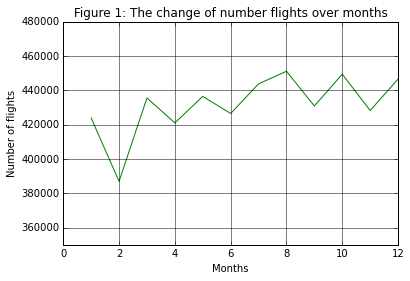

[Row(month=12, count=446521), Row(month=1, count=423861), Row(month=6, count=426490), Row(month=3, count=435516), Row(month=5, count=436432), Row(month=9, count=430861), Row(month=4, count=420995), Row(month=8, count=451086), Row(month=7, count=443736), Row(month=10, count=449369), Row(month=11, count=428227), Row(month=2, count=386954)]
    month   count
0       1  423861
1       2  386954
2       3  435516
3       4  420995
4       5  436432
5       6  426490
6       7  443736
7       8  451086
8       9  430861
9      10  449369
10     11  428227
11     12  446521


In [9]:
statistic_month = df.groupBy('month').count().orderBy('month').take(12)
#statistic_day_of_week.show()
pdf = pd.DataFrame(data=statistic_month,columns = ['month','count'])
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.ylim([350000,480000])
plt.title('Figure 1: The change of number flights over months')
plt.grid(True,which="both",ls="-")
plt.plot(pdf.month, pdf)
plt.show()
print (df.groupBy('month').count().take(12))
print(pdf)


<font color=OrangeRed size=4>**[Group 6]**</font>
<div class="alert alert-warning"> According to the figure above, we can conclude that, the busiest months are August, October, and December; while the Feburary is the slack season among the whole year.  

Furthermore, Feburary is the only month that the flight number is below 400,000.  

We could infer that during the festivals or vacations, the flight number tends to increase with respect to workdays.  

e.g.  Christmas Holidays(December) or Summer holiday(August) are busy season while the ordinary working period (Feburary) is slack season in America.
</div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

[Row(day_of_week=1, count=754636), Row(day_of_week=6, count=695245), Row(day_of_week=3, count=756864), Row(day_of_week=5, count=751531), Row(day_of_week=4, count=751537), Row(day_of_week=7, count=713703), Row(day_of_week=2, count=756532)]


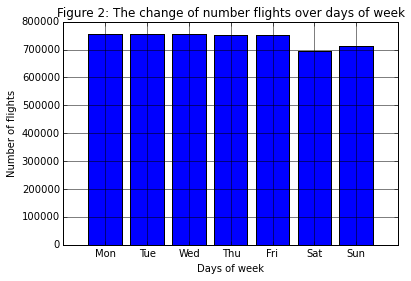

In [10]:
statistic_day_of_week = df.groupBy("day_of_week").count().take(7)
print(statistic_day_of_week)
pdf = pd.DataFrame(statistic_day_of_week)
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2: The change of number flights over days of week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])

# plot bar chart
plt.bar(pdf[0],pdf[1], align='center')

plt.xticks(pdf[0], day_of_week_label)
plt.show()

<font color=OrangeRed size=4>**[Group 6]**</font>  

<div class="alert alert-warning"> From this figure we saw that during weekdays the flight numbers tend to be flat, without remarkable difference. And the overall flight number of weekdays is higher than those in weekends.  
The result may relate to the different ticket price during the week, or maybe there are more flights for business than for travel.</div>  

#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

     0       1
0    1  169674
1    2  169829
2    3  168678
3    4  169399
4    5  168423
5    6  170650
6    7  172210
7    8  170674
8    9  170077
9   10  170252
10  11  172362
11  12  169542
12  13  171230
13  14  172081
14  15  170737
15  16  169985
16  17  170132
17  18  171868
18  19  169483
19  20  171142
20  21  172283
21  22  171305
22  23  170695
23  24  166379
24  25  167435
25  26  168767
26  27  171222
27  28  171760
28  29  155695
29  30  155915
30  31  100164


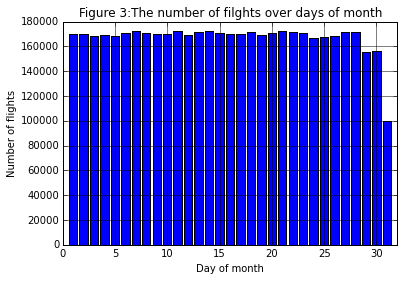

In [11]:
statistic_day_of_month = df.groupBy("day_of_month").count().orderBy("day_of_month").take(31)
#statistic_day_of_month.show()
pdf = pd.DataFrame(statistic_day_of_month)
print(pdf)

# plot bar chart
plt.xlim([0,32])
plt.xlabel("Day of month")
plt.ylabel("Number of flights")
plt.title("Figure 3:The number of filghts over days of month")
plt.grid(True, which="both",ls="-")

plt.bar(pdf[0],pdf[1],align="center")
plt.show()


     0       1
0    0   13641
1    1   12825
2    2    2842
3    3     564
4    4     486
5    5   13357
6    6  257486
7    7  398796
8    8  397060
9    9  341597
10  10  300375
11  11  313577
12  12  356830
13  13  360762
14  14  294214
15  15  313131
16  16  317809
17  17  368695
18  18  338147
19  19  287033
20  20  232898
21  21  168138
22  22   52395
23  23   37389


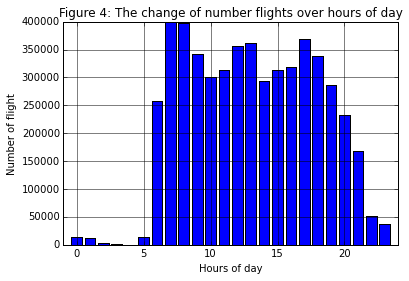

In [12]:

statistic_hour_of_day = df.withColumn("hours", (df.scheduled_departure_time/100).cast("int")).groupBy("hours").count().orderBy("hours").take(24)
pdf = pd.DataFrame(data = statistic_hour_of_day)
print(pdf)
#plot char chart
plt.xlim([-1,24])
plt.xlabel("Hours of day")
plt.ylabel("Number of flight")
plt.bar(pdf[0],pdf[1],align="center")
plt.grid(True,which="both",ls='-')
plt.title('Figure 4: The change of number flights over hours of day')
##plt.show()

<font color=OrangeRed size=4>**[Group 6]** </font>   

<div class="alert alert-warning"> According to the Figure 4, the rush hour of the day are around 7AM - 8AM. Accordingly, the number of night flight(from 10 PM to 5 AM) are notably low. </div>

     0       1
0    0   13641
1    1   12825
2    2    2842
3    3     564
4    4     486
5    5   13357
6    6  257486
7    7  398796
8    8  397060
9    9  341597
10  10  300375
11  11  313577
12  12  356830
13  13  360762
14  14  294214
15  15  313131
16  16  317809
17  17  368695
18  18  338147
19  19  287033
20  20  232898
21  21  168138
22  22   52395
23  23   37389


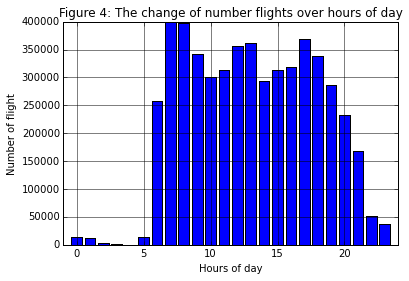

In [13]:
statistic_hour_of_day = df.withColumn("hours", (df.scheduled_departure_time/100).cast("int")).groupBy("hours").count().orderBy("hours").take(24)
pdf = pd.DataFrame(data = statistic_hour_of_day)
print(pdf)
#plot char chart
plt.xlim([-1,24])
plt.xlabel("Hours of day")
plt.ylabel("Number of flight")
plt.bar(pdf[0],pdf[1],align="center")
plt.grid(True,which="both",ls='-')
plt.title('Figure 4: The change of number flights over hours of day')
##plt.show()

<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> According to the Figure 4, the rush hour of the day are around 7AM - 8AM. Accordingly, the number of night flight(from 10 PM to 5 AM) are notably low. </div>


#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights?
</div>

In [14]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
                .groupBy(df.dest_airport)
                .agg(func.count('*').alias('count2'))
            )


# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, stat_src.src_airport == stat_dest.dest_airport, how='outer')

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            # select top airpoint in termns of number of flights
                            .select(['src_airport','total']).orderBy(desc('total'))
                        )
stat_airport_traffic.show(20)


+-----------+------+
|src_airport| total|
+-----------+------+
|        ORD|561461|
|        DFW|516523|
|        ATL|443074|
|        LAX|306453|
|        STL|304409|
|        DEN|285526|
|        PHX|280560|
|        DTW|276272|
|        PIT|262939|
|        CLT|259712|
|        MSP|247980|
|        SFO|235478|
|        EWR|233991|
|        IAH|208591|
|        LGA|203362|
|        BOS|199696|
|        LAS|189920|
|        PHL|186897|
|        DCA|176115|
|        MCO|153720|
+-----------+------+
only showing top 20 rows



#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>


In [15]:

stat_carrier = (df
                .groupBy('carrier')
                .agg(func.count('*').alias('count'))
                .orderBy(desc('count'))
                )

stat_carrier.show(20)


+-------+------+
|carrier| count|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
|     CO|484834|
|     NW|482798|
|     TW|258205|
|     HP|177851|
|     AS|117475|
+-------+------+



<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning">The result of count shows that in this dataset, the total number of carriers is 10 </div>


### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

In [8]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy("year","hour")

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour_25 = (
            delay_ratio_per_hour
                .orderBy('hour')
                .select(["hour", "delay_ratio"])
    ).collect()

pdf_delay_ratio_per_hour = pd.DataFrame(data=delay_ratio_per_hour_25)


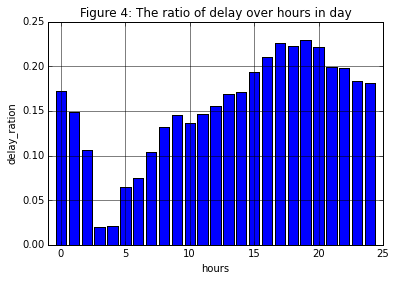

In [17]:
# plot a bar chart

plt.bar(pdf_delay_ratio_per_hour[0],pdf_delay_ratio_per_hour[1],align = 'center')
plt.xlabel('hours')
plt.ylabel('delay_ration')
plt.xlim(-1,25)
plt.grid('True',which = 'major',axis= 'both',ls = '-')
plt.title('Figure 4: The ratio of delay over hours in day')
plt.show()


<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> While observing the result above, we found that the range of x axis is from 0h to 24h. Actually the 24 h is the 0h of the following day, which is redundant information. So instead of doing "collect()", we use "take(24)" to show only from 0h to 24 h in one single day.  

The code and figure are shown as below.
</div>

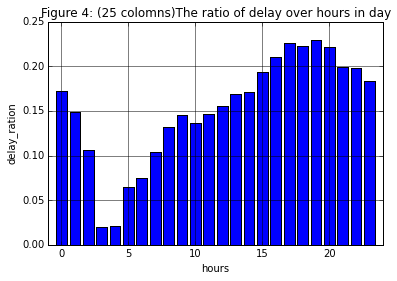

In [18]:
# plot the bar chart with 24 colomns

delay_ratio_per_hour = (
            delay_ratio_per_hour
                .orderBy('hour')
                .select(["hour", "delay_ratio"])
    ).take(24)

pdf_delay_ratio_per_hour = pd.DataFrame(data=delay_ratio_per_hour)
plt.bar(pdf_delay_ratio_per_hour[0],pdf_delay_ratio_per_hour[1],align = 'center')
plt.xlabel('hours')
plt.ylabel('delay_ration')
plt.xlim(-1,24)
plt.grid('True',which = 'major',axis= 'both',ls = '-')
plt.title('Figure 4: (25 colomns)The ratio of delay over hours in day')
plt.show()

#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

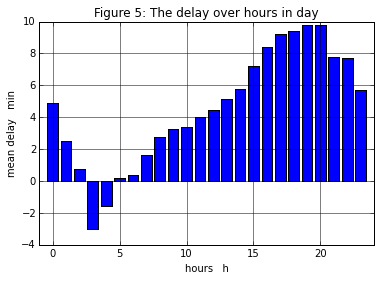

In [19]:
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy('hour')
        .select(['hour','mean_delay'])
    )
    
pdf_mean_delay_per_hour = pd.DataFrame(data = mean_delay_per_hour.take(24))

plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align = 'center')
plt.xlabel("hours   h")
plt.ylabel("mean delay   min")
plt.grid(True,which = 'both',ls = '-')
plt.title('Figure 5: The delay over hours in day')
plt.xlim(-1,24)
plt.show()
#print(pdf_mean_delay_per_hour)






<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> According to Figure 5, we observed that the longest delay tend to happen in the evening(5PM - 8PM), and in the morning and late at night the delay is relatively short. Besides, in 3AM and 4AM, the delay time is minus, which means the flights often depart in advance.
</div>

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

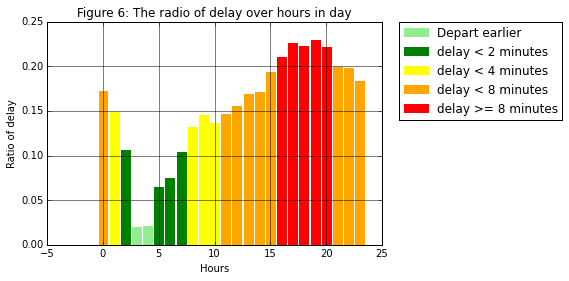

In [21]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In the new figure (Figure 6), we have more information in a single plot. The flights in 3AM to 4AM have very low probability of being delayed, and actually depart earlier than their schedule. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.

This example shows us that the way representing results are also important.



<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> From the this figure we can see that the high delay ratio always comes with a longer delay time. e.g. all the hours with delay ratio larger then 0.2(**red bars in the figure**) have a delay time greater than 8 minutes.
</div>

#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

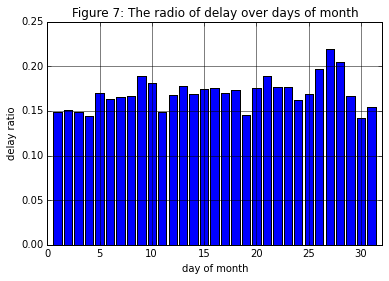

In [22]:

####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
statistic_day_of_month = (
    df_with_delay
        .groupBy("day_of_month")
        .agg(func.sum("is_delay")/func.count("*"))
        # order by day_of_month
        .orderBy("day_of_month")
    )
    
# collect data and plot
pdf_day_of_month = pd.DataFrame(data=statistic_day_of_month.take(31))
plt.xlabel("day of month")
plt.ylabel("delay ratio")
plt.grid(True,which="both",ls='-')
plt.bar(pdf_day_of_month[0],pdf_day_of_month[1],align='center')
plt.xlim([0,32])
plt.title('Figure 7: The radio of delay over days of month')
plt.show()



<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> As shown in Figure 7, the delay ratio over day of month range from 0.13 to 0.23. The day most likely to have delayed flight are 26,27,28 of the month.  
In order to add the delay time information to the Figure 7, we use the same method in Figure 6, i.e. use different colors to show the range of delay time.  
As the result shown in the figure below, only 27th of the month has the mean delay time over 8 minuties.(The **red bar** in the figure)
</div>

delay_per_day_of_month = df_with_delay.withColumn('day_of_month', df["day_of_month"])
statistic_delay_day_of_month = df_with_delay.groupBy("year","day_of_month")
mean_delay_per_day_of_month = statistic_delay_day_of_month.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_day_of_month = (
    mean_delay_per_day_of_month
        .orderBy('day_of_month')
        .select(['day_of_month','mean_delay'])
    )
    
pdf_mean_delay_per_day_of_month = pd.DataFrame(data = mean_delay_per_day_of_month.take(31))


plt.xlabel("Day_of_month")
plt.ylabel("Ratio of delay")
plt.title('Figure : The radio of delay over day of month')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_day_of_month[0], pdf_day_of_month[1], align='center', edgecolor = "black")
print(len(bars))
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_day_of_month[1][i] < 0:
         color = 'lightgreen'
    elif pdf_mean_delay_per_day_of_month[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_day_of_month[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_day_of_month[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-1,31)
plt.show()
plt.bar(pdf_mean_delay_per_day_of_month[0],pdf_mean_delay_per_day_of_month[1],align = 'center')
plt.xlabel("day of month   ")
plt.ylabel("mean delay   min")
plt.grid(True,which = 'both',ls = '-')
plt.title('Figure 5: The mean delay over hours in day')
plt.xlim(-1,31)
plt.show()
#print(pdf_mean_de

#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

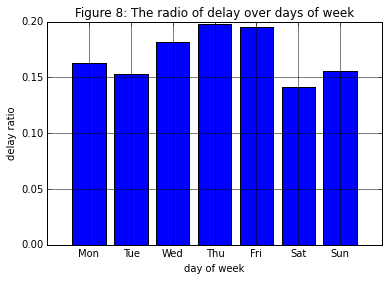

In [23]:
####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
    df_with_delay.groupBy("day_of_week")
        .agg(func.sum("is_delay")/func.count('*'))
        .orderBy("day_of_week")
        
    )
    
# collect data and plot
pdf_day_of_week = pd.DataFrame(data = statistic_day_of_week.take(7))
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])

plt.bar(pdf_day_of_week[0],pdf_day_of_week[1],align = 'center')
plt.xlabel("day of week")
plt.ylabel("delay ratio")
plt.grid(True,which = 'both',ls = '-')
plt.xlim(0,8)

plt.title('Figure 8: The radio of delay over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()


7


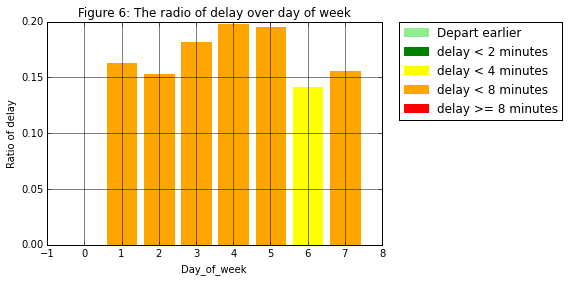

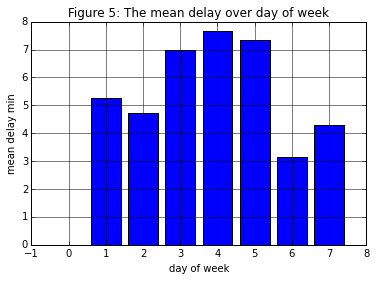

In [24]:

statistic_delay_day_of_week = df_with_delay.groupBy("year","day_of_week")
mean_delay_per_day_of_week = statistic_delay_day_of_week.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_day_of_week = (
    mean_delay_per_day_of_week
        .orderBy('day_of_week')
        .select(['day_of_week','mean_delay'])
    )
    
pdf_mean_delay_per_day_of_week = pd.DataFrame(data = mean_delay_per_day_of_week.take(7))


plt.xlabel("Day_of_week")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over day of week')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_day_of_week[0], pdf_day_of_week[1], align='center', edgecolor = "black")
print(len(bars))
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_day_of_week[1][i] < 0:
         color = 'lightgreen'
    elif pdf_mean_delay_per_day_of_week[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_day_of_week[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_day_of_week[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-1,8)
plt.show()

plt.bar(pdf_mean_delay_per_day_of_week[0],pdf_mean_delay_per_day_of_week[1],align = 'center')
plt.xlabel("day of week")
plt.ylabel("mean delay min")
plt.grid(True,which = 'both',ls = '-')
plt.title('Figure 5: The mean delay over day of week')
plt.xlim(-1,8)
plt.show()


<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> Figure 8 illustrates that on Thursday and Friday the flights are most likely to be delayed(with ratio up to 0.20), while on Saturday the ratio is relatively low(less than 0.15).
</div>

#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

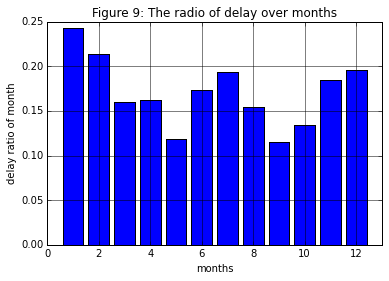

In [25]:
####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    df_with_delay.groupBy("month")
    .agg(func.sum('is_delay')/func.count('*'))
    .orderBy("month")
    )

# collect data and plot
pdf_month = pd.DataFrame(data = statistic_month.take(12))

plt.bar(pdf_month[0],pdf_month[1],align = 'center')
plt.xlabel("months")
plt.ylabel("delay ratio of month")
plt.grid(True,which='both',ls='-')
plt.xlim(0,13)
plt.title('Figure 9: The radio of delay over months')
plt.show()


12


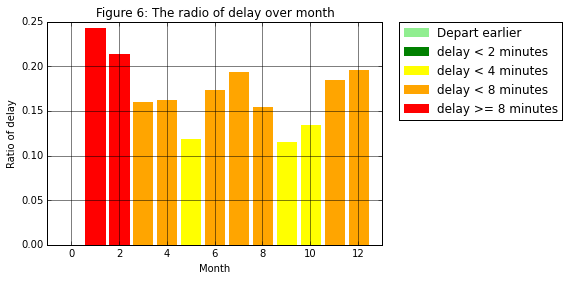

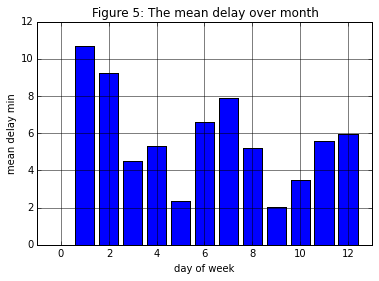

In [26]:
statistic_delay_month = df_with_delay.groupBy("year","month")
mean_delay_per_month = statistic_delay_month.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_month = (
    mean_delay_per_month
        .orderBy('month')
        .select(['month','mean_delay'])
    )
    
pdf_mean_delay_per_month = pd.DataFrame(data = mean_delay_per_month.take(12))


plt.xlabel("Month")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over month')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_month[0], pdf_month[1], align='center', edgecolor = "black")
print(len(bars))
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_month[1][i] < 0:
         color = 'lightgreen'
    elif pdf_mean_delay_per_month[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_month[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_month[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-1,13)
plt.show()

plt.bar(pdf_mean_delay_per_month[0],pdf_mean_delay_per_month[1],align = 'center')
plt.xlabel("day of week")
plt.ylabel("mean delay min")
plt.grid(True,which = 'both',ls = '-')
plt.title('Figure 5: The mean delay over month')
plt.xlim(-1,13)
plt.show()



<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> From Figure 9 we can conclude that the highest delay ratio takes place in January and Feburary(over 0.20). This should be considered as a quite high ratio compared with "day of month" and "day of week."

Also, the **hours** during one day also has a remarkable impact on the delay ratio(refered from **Figure 6**).
We can simply conclude that the **month** and **hours** are more important factors on the flight delay with respect to **day of month** and **day of week**
</div>

We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend, are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)

Putting things together, we can have a global picture of the whole year!

In [27]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())
print(pdf)

        0   1   2  3         4
0    1994   1   1  6  0.121484
1    1994   1   2  7  0.249577
2    1994   1   3  1  0.316953
3    1994   1   4  2  0.253472
4    1994   1   5  3  0.320918
5    1994   1   6  4  0.316606
6    1994   1   7  5  0.243818
7    1994   1   8  6  0.163427
8    1994   1   9  7  0.196553
9    1994   1  10  1  0.195652
10   1994   1  11  2  0.200411
11   1994   1  12  3  0.303967
12   1994   1  13  4  0.254373
13   1994   1  14  5  0.259518
14   1994   1  15  6  0.130622
15   1994   1  16  7  0.276416
16   1994   1  17  1  0.306501
17   1994   1  18  2  0.273498
18   1994   1  19  3  0.285787
19   1994   1  20  4  0.302062
20   1994   1  21  5  0.206234
21   1994   1  22  6  0.101059
22   1994   1  23  7  0.136844
23   1994   1  24  1  0.174423
24   1994   1  25  2  0.218615
25   1994   1  26  3  0.309078
26   1994   1  27  4  0.393276
27   1994   1  28  5  0.357378
28   1994   1  29  6  0.192912
29   1994   1  30  7  0.274829
..    ...  ..  .. ..       ...
335  199

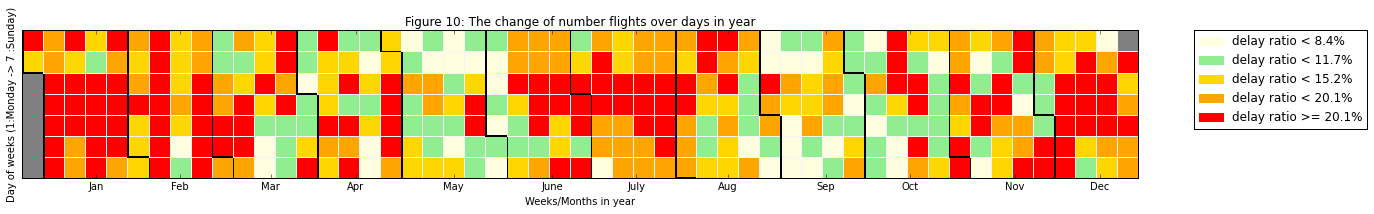

In [28]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months in year")
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)")
plt.title('Figure 10: The change of number flights over days in year')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])

ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke',label = 'what')

    ax.add_patch(rect)
    
    # drawing borders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black',label = 'hello')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks([0.9,2.1,3.4,4.6,6.0,7.4,8.6,9.9,11.3,12.5,14,15.2],('Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'))

plt.show()


#### Question 5.6
<div class="alert alert-info">
Explain figure 10.
</div>

<font color=OrangeRed size=4>**[Group 6]**</font>   
<div class="alert alert-warning"> The figure above shows the delay ratio among the whole year 1994.
According to the ratio of the red cube, January is the month with highest delay ratio, of which 20 days has the delay ratio over 20%. Also Feburary, July, December has the delay ratio over 13 days.  
On the contrary, May, September have the relatively low delay ratio.  
    
    
When we look at this figure in "day of week", Friday and Thursday seem to be the days with highest delay ratio, while the flight in weekends tend to be more punctual.  
  
  
According to this figure, when passengers book flight, they can choose the date with lower delay ratio; or when they decide to travel on those high delay ratio dates, it's better to buy flight delay insurance.
</div>

#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

In [29]:
stat_airport_traffic.show()
top_20_airports = [item[0] for item in stat_airport_traffic.take(20)]
#print (top_20_airports)

+-----------+------+
|src_airport| total|
+-----------+------+
|        ORD|561461|
|        DFW|516523|
|        ATL|443074|
|        LAX|306453|
|        STL|304409|
|        DEN|285526|
|        PHX|280560|
|        DTW|276272|
|        PIT|262939|
|        CLT|259712|
|        MSP|247980|
|        SFO|235478|
|        EWR|233991|
|        IAH|208591|
|        LGA|203362|
|        BOS|199696|
|        LAS|189920|
|        PHL|186897|
|        DCA|176115|
|        MCO|153720|
+-----------+------+
only showing top 20 rows



In [30]:

####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

#select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay.src_airport.isin(top_20_airports))
        # group by source airport
        .groupBy('src_airport')
        #  calculate the delay ratio
        .agg(func.sum("is_delay")/func.count('*').alias('delay_ratio'),(func.mean('arrival_delay')).alias('mean_delay'))
        
        # sort by name of airport
        .orderBy(['src_airport'])
    )

statistic_ratio_delay_airport.show(20)


+-----------+-------------------------------------------+------------------+
|src_airport|(sum(is_delay) / count(1) AS `delay_ratio`)|        mean_delay|
+-----------+-------------------------------------------+------------------+
|        ATL|                        0.21205403501801467| 7.433333485357767|
|        BOS|                        0.20337767149902855| 7.364657993951195|
|        CLT|                        0.22251161209048542| 8.260802384407231|
|        DCA|                         0.1599864322460286| 4.773016724592382|
|        DEN|                        0.20354670607451195| 6.577964625772651|
|        DFW|                        0.22524719636014578|  9.32878026820831|
|        DTW|                        0.17069213736050923| 4.779673596010123|
|        EWR|                        0.26439606741573035|11.807407869413359|
|        IAH|                         0.1660171622737133|  4.85737277372192|
|        LAS|                        0.17218759213241797| 6.108543246539747|

   src_airport   total
0          ATL  443074
1          BOS  199696
2          CLT  259712
3          DCA  176115
4          DEN  285526
5          DFW  516523
6          DTW  276272
7          EWR  233991
8          IAH  208591
9          LAS  189920
10         LAX  306453
11         LGA  203362
12         MCO  153720
13         MSP  247980
14         ORD  561461
15         PHL  186897
16         PHX  280560
17         PIT  262939
18         SFO  235478
19         STL  304409


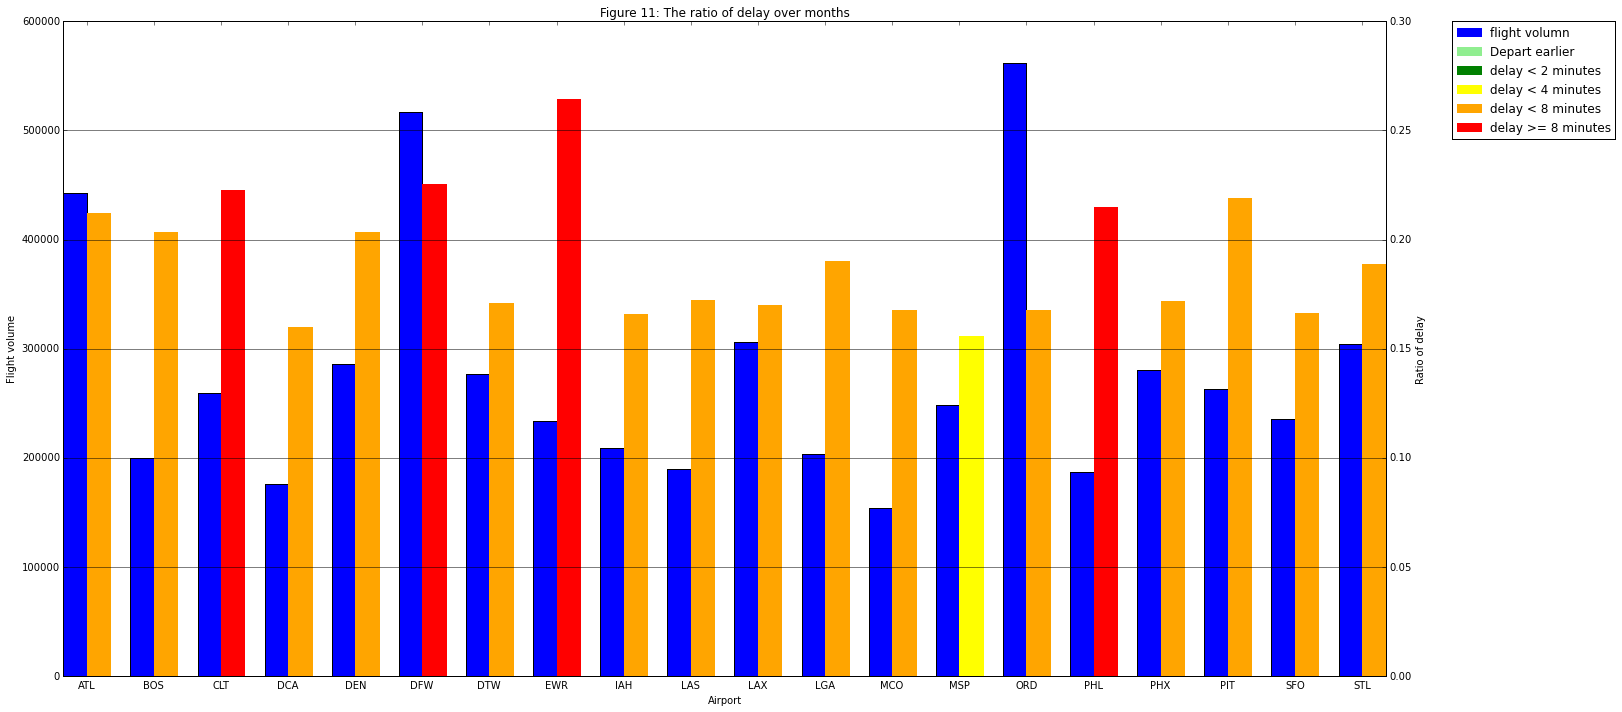

In [31]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.take(K), columns=['src_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by="src_airport").reset_index(drop=True)
print(pdf_top_20_airport_volume)
top_20_airports.sort()
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Figure 11: The ratio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='b', 
        label='flight volume')


        

bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', 
       label='Delay ratio')

for i in range(0, len(bar2)):
    color2 = 'red'
    if pdf_ratio_delay_airport[2][i] < 0:
         color2 = 'lightgreen'
    elif pdf_ratio_delay_airport[2][i] < 2:
        color2 = 'green'
    elif pdf_ratio_delay_airport[2][i] < 4:
        color2 = 'yellow'
    elif pdf_ratio_delay_airport[2][i] < 8:
        color2 = 'orange'
    bar2[i].set_color(color2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc=0)

patch0 = mpatches.Patch(color='blue', label='flight volumn')
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch0,patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()




<font color=OrangeRed size=4>**[Group 6]**</font>   
<div class="alert alert-warning"> From the figure above we observed that there is no evident relationship between airports and the delay ratio. e.g. airport EWR has a realtively low flight volumn compared with other airports in this figure but with a high delay ratio(over 0.25). At the same time, airport ORD is in the contraty: volumns ranked 1st but with a medium delay ratio(around 0.17)</div>

#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?  
Comment the figure!
</div>

In [32]:

K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        .filter(df_with_delay.carrier.isin(top_20_carriers))
        # group by carriers
        .groupBy("carrier")
        #  calculate the delay ratio
        .agg(func.sum("is_delay")/func.count("*").alias("delay_ratio"),(func.mean('arrival_delay')).alias('mean_delay'))
        # sort by name of airport
        .orderBy(desc("carrier"))
    )
statistic_ratio_delay_carrier.show(20)


+-------+-------------------------------------------+------------------+
|carrier|(sum(is_delay) / count(1) AS `delay_ratio`)|        mean_delay|
+-------+-------------------------------------------+------------------+
|     WN|                        0.12829795587751536|   4.5956443470434|
|     US|                        0.18422298014001534|  6.42670592202661|
|     UA|                         0.1686528375733855| 5.134817302986583|
|     TW|                        0.18212273193780135| 5.759134850420274|
|     NW|                         0.1294806523639286|2.0579237244539073|
|     HP|                        0.18625141269939444| 7.902057641207331|
|     DL|                        0.18328443065157582| 6.573160039794818|
|     CO|                         0.1955576547849367| 7.279157626520006|
|     AS|                         0.1596424771227921|5.7566915842777915|
|     AA|                         0.1752444006939166|   5.6965564881402|
+-------+------------------------------------------

  carrier   count
0      AA  722277
1      AS  117475
2      CO  484834
3      DL  874526
4      HP  177851
5      NW  482798
6      TW  258205
7      UA  638750
8      US  857906
9      WN  565426


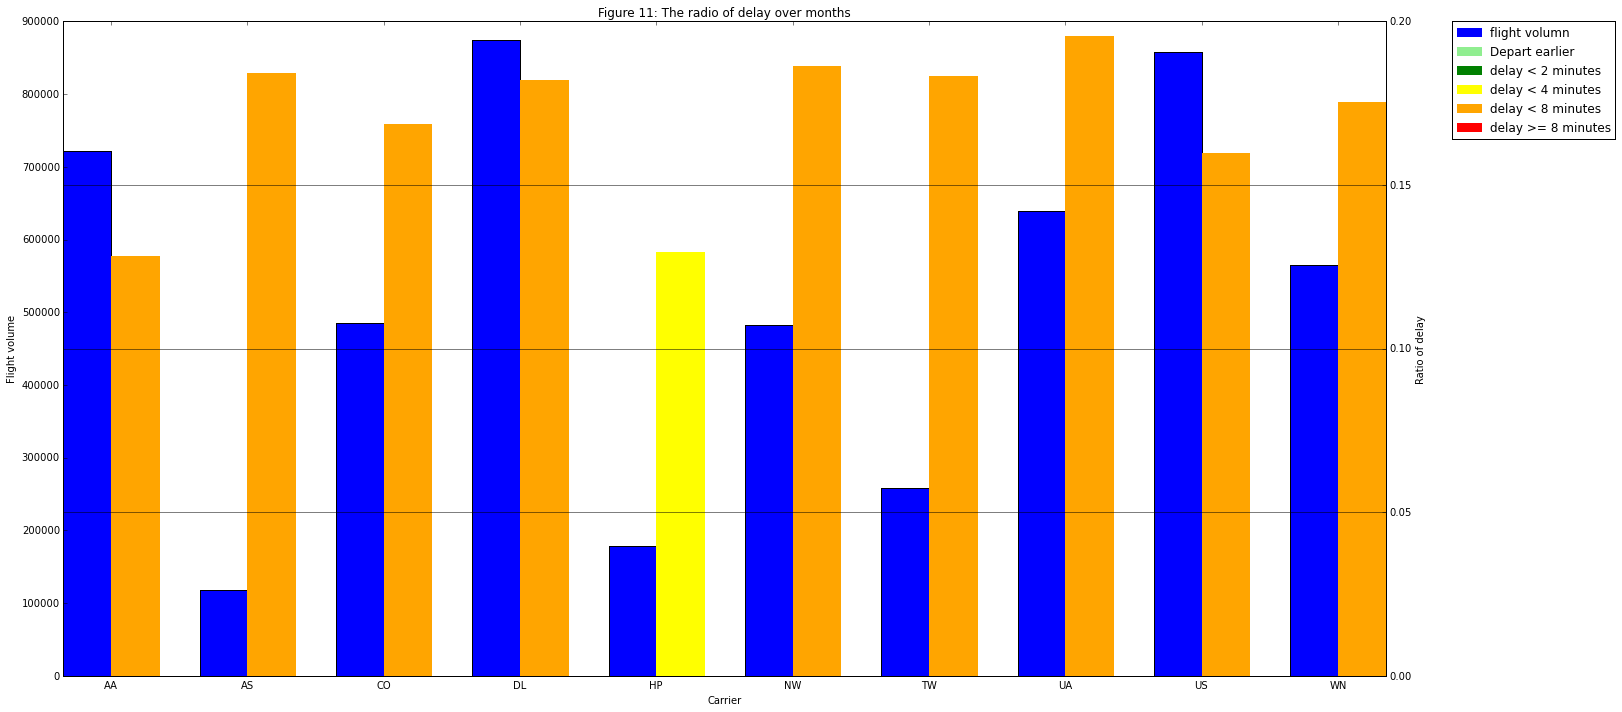

In [33]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_carrier.take(K), columns=['carrier', 'count'])
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by="carrier").reset_index(drop=True)
print(pdf_top_20_carrier_volume)
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_carriers)

plt.title('Figure 11: The radio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color='b', 
        label='flight volume')


bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', 
       label='Delay ratio')

for i in range(0, len(bar2)):
    color2 = 'red'
    if pdf_ratio_delay_carrier[2][i] < 0:
         color2 = 'lightgreen'
    elif pdf_ratio_delay_carrier[2][i] < 2:
        color2 = 'green'
    elif pdf_ratio_delay_carrier[2][i] < 4:
        color2 = 'yellow'
    elif pdf_ratio_delay_carrier[2][i] < 8:
        color2 = 'orange'
    bar2[i].set_color(color2)
    
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc=0)
patch0 = mpatches.Patch(color='blue', label='flight volumn')
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch0,patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

<font color=OrangeRed size=4>**[Group 6]**</font>   
<div class="alert alert-warning"> Similar to the previous figure, there is no strong relation between carrier and delay ratio. e.g. AS has the lowest flight ratio among the 20 carriers  but with a high delay ratio(around 0.17)  </div>

# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

In [9]:

# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy("src_airport")
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports,src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])


0
2


#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [10]:

# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest =df.groupBy("dest_airport").agg(func.count("*").alias('count')).orderBy(desc('count'))

dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
dest_airports_idx = range(0,num_dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))

# test the dictionary
print(map_dest_airport_to_index['ORD'])
print(map_dest_airport_to_index['ATL'])


0
2


#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [11]:

# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top
stat_carrier =(
    df.groupBy('carrier')
     .agg(func.count('*').alias('count'))
     .orderBy('carrier')
)
list_carrier = [elem[0] for elem in stat_carrier.collect()]


num_stat_carrier = len(list_carrier)
carrier_idx = range(0,num_stat_carrier)

map_carriers_to_index = dict(zip(list_carrier,carrier_idx))

print (map_carriers_to_index['AA'])
print (map_carriers_to_index['CO'])
                   



0
2


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [12]:
the_most_common_month = (
    df
        .groupBy('month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)
       

The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [13]:
the_most_common_day_of_month = df.groupBy('day_of_month').agg(func.count('*').alias('count')).orderBy(desc('count')).first()[0]

the_most_common_day_of_week =  df.groupBy('day_of_week').agg(func.count('*').alias('count')).orderBy(desc('count')).first()[0]


print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [14]:
the_most_common_s_departure_time = df.groupBy("scheduled_departure_time").agg(func.count("*").alias("count")).orderBy(desc("count")).first()[0]

the_most_common_s_arrival_time = df.groupBy("scheduled_arrival_time").agg(func.count("*").alias("count")).orderBy(desc("count")).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)


The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [15]:
mean_distance = df.agg(func.mean("distance")).first()[0]
mean_distance2 = df.agg(func.sum("distance")/func.count('*')).first()[0]


print("mean distance:", mean_distance)
print("mean distance2:", mean_distance2)
num1 = df.count()
num2 = df.select("distance").filter(df.distance != 0).count()
print ("Number including null distance:",num1)
print ("Number of non-null distance:",num2)
print("mean with extra number",3459074085/num1)
print("real mean distance",3459074085/num2)


mean distance: 670.7402911985982
mean distance2: 667.7687320658033
Number including null distance: 5180048
Number of non-null distance: 5157099
mean with extra number 667.7687320658033
real mean distance 670.7402911985982


<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> Here when we calculated the mean distance with different ways, we got the different results as shown in the variables "mean_distance" and "mean_distance2". This is because when we calculate the mean distance we include the extra number of which the distance value is null. Instead we calculate the number of valide value and get the final result: 670.74.</div> 

#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [16]:

# calculate mean arrival delay
mean_arrival_delay = df.agg(mean("arrival_delay")).first()[0]
print("mean arrival delay:", mean_arrival_delay)


mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

In [17]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != "NA" and len(value) > 0

#cleaned_data.take(2)

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
         LabeledPoint( 
             int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
             [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                 map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                 map_src_airport_to_index[values[16]] if is_valid(values[16]) else map_src_airport_to_index[src_airports[0]], # src_airport
                 map_dest_airport_to_index[values[17]] if is_valid(values[17]) else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                 int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                 1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                
             ]
         )
     )

print(data.take(10))
# Split the data into training and test sets (30% held out for testing)
trainingData, testData = data.randomSplit([0.7,0.3])
trainingData.take(10)
trainingData.cache()
testData.cache()


[LabeledPoint(-9.0, [1994.0,1.0,7.0,5.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(-11.0, [1994.0,1.0,8.0,6.0,900.0,1003.0,8.0,9.0,55.0,290.0,1.0]), LabeledPoint(20.0, [1994.0,1.0,10.0,1.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(88.0, [1994.0,1.0,11.0,2.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(21.0, [1994.0,1.0,12.0,3.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(5.662489742613603, [1994.0,1.0,13.0,4.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(2.0, [1994.0,1.0,14.0,5.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(1.0, [1994.0,1.0,15.0,6.0,900.0,1003.0,8.0,9.0,55.0,290.0,1.0]), LabeledPoint(-8.0, [1994.0,1.0,17.0,1.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0]), LabeledPoint(-4.0, [1994.0,1.0,18.0,2.0,900.0,1003.0,8.0,9.0,55.0,290.0,0.0])]


PythonRDD[128] at RDD at PythonRDD.scala:48

<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> From the previous graph, we can notice that weekdays and weekends indeed have different influence on the delay ratio, so creating a new feature "is_weekend" does make sense.  </div>

## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


In [43]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2} model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

In [44]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
#print(labelsAndPredictions.take(10))

testMSE = labelsAndPredictions.map(
    lambda p: (p[0]-p[1])**2).mean()
print(labelsAndPredictions)
print('Test Mean Squared Error = ' + str(testMSE))
print(testMSE)

org.apache.spark.api.java.JavaPairRDD@7070cc9e
Test Mean Squared Error = 492.216187142838
492.216187142838


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> No, it indicates that it's a very bad model. The mean squared error is more than 400, which means the mean error range is 20 mins </div>

## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

In [45]:

from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)

predictions=forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions=testData.map(lambda l:l.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p:(p[0]-p[1])**2).mean()
print('Test Mean Squared Error = ' + str(testMSE))


Test Mean Squared Error = 482.1209138560402


In [46]:
labelsAndPredictions.take(10)

[(-9.0, 5.669266711430748),
 (1.0, 0.8462069197857895),
 (-4.0, 5.669266711430748),
 (-16.0, 5.669266711430748),
 (12.0, 5.669266711430748),
 (5.662489742613603, 5.669266711430748),
 (-2.0, 0.8462069197857895),
 (-5.0, 4.9970117128314335),
 (-13.0, 2.913022121320828),
 (-5.0, 4.488541450438231)]

<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> The result produced by random forest is better than that of decision tree, compared with decision tree, ramdom forest can avoid overfitting problem relatively. Meantime, through voting, it can provide better prediction.  
However it doesn't behave well in this case, we suppose that the choosen features might be inadequate.</div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

In [21]:
from pyspark.mllib.tree import RandomForest, RandomForestModel
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
for maxDepth in [12, 15,22]:
    for maxBins in [225,350,500]:
        for numTrees in [5,10,20]:
            print("Train model with maxDepth=%d MaxBins_=%d NumTrees=%d" % (maxDepth, maxBins, numTrees))
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=maxBins)
            predictions=forest_model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions=testData.map(lambda l:l.label).zip(predictions)
            testMSE = labelsAndPredictions.map(lambda p:(p[0]-p[1])**2).mean()
            print('Test Mean Squared Error = ' + str(testMSE))

Train model with maxDepth=12 MaxBins_=225 NumTrees=5
Test Mean Squared Error = 484.9728692053775
Train model with maxDepth=12 MaxBins_=225 NumTrees=10
Test Mean Squared Error = 483.74101673955454
Train model with maxDepth=12 MaxBins_=225 NumTrees=20
Test Mean Squared Error = 483.9846308722438
Train model with maxDepth=12 MaxBins_=350 NumTrees=5
Test Mean Squared Error = 486.095134424164
Train model with maxDepth=12 MaxBins_=350 NumTrees=10
Test Mean Squared Error = 486.72496199848723
Train model with maxDepth=12 MaxBins_=350 NumTrees=20
Test Mean Squared Error = 481.85751581106956
Train model with maxDepth=12 MaxBins_=500 NumTrees=5
Test Mean Squared Error = 489.8154971508301
Train model with maxDepth=12 MaxBins_=500 NumTrees=10
Test Mean Squared Error = 484.2057651128999
Train model with maxDepth=12 MaxBins_=500 NumTrees=20
Test Mean Squared Error = 483.3539401210662
Train model with maxDepth=15 MaxBins_=225 NumTrees=5
Test Mean Squared Error = 464.71269022691945
Train model with maxD

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1035, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/spark/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 883, in send_command
    response = connection.send_command(command)
  File "/opt/spark/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1040, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 48578)
----------------------------------------


Traceback (most recent call last):
  File "/opt/conda/lib/python3.5/socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.5/socketserver.py", line 341, in process_request
    self.finish_request(request, client_address)
  File "/opt/conda/lib/python3.5/socketserver.py", line 354, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/conda/lib/python3.5/socketserver.py", line 681, in __init__
    self.handle()
  File "/opt/spark/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/opt/spark/python/pyspark/serializers.py", line 557, in read_int
    raise EOFError
EOFError


Py4JError: An error occurred while calling o1283.trainRandomForestModel

Train model with maxDepth=5 MaxBins_=225 NumTrees=5
Test Mean Squared Error = 526.3103061733494
Train model with maxDepth=5 MaxBins_=225 NumTrees=10
Test Mean Squared Error = 526.1678706302764
Train model with maxDepth=5 MaxBins_=225 NumTrees=20
Test Mean Squared Error = 525.7967089394102
Train model with maxDepth=5 MaxBins_=225 NumTrees=50
Test Mean Squared Error = 525.6403071392925
Train model with maxDepth=5 MaxBins_=255 NumTrees=5
Test Mean Squared Error = 526.8942322222852
Train model with maxDepth=5 MaxBins_=255 NumTrees=10
Test Mean Squared Error = 526.070653023138
Train model with maxDepth=5 MaxBins_=255 NumTrees=20
Test Mean Squared Error = 525.7530368634634
Train model with maxDepth=5 MaxBins_=255 NumTrees=50
Test Mean Squared Error = 525.676949689774
Train model with maxDepth=5 MaxBins_=350 NumTrees=5
Test Mean Squared Error = 526.4787046088007
Train model with maxDepth=5 MaxBins_=350 NumTrees=10
Test Mean Squared Error = 526.2463964470909
Train model with maxDepth=5 MaxBins_=350 NumTrees=20
Test Mean Squared Error = 525.6214505370939
Train model with maxDepth=5 MaxBins_=350 NumTrees=50
Test Mean Squared Error = 525.6801468035432
Train model with maxDepth=5 MaxBins_=500 NumTrees=5
Test Mean Squared Error = 527.3044130116299
Train model with maxDepth=5 MaxBins_=500 NumTrees=10
Test Mean Squared Error = 526.515867247512
Train model with maxDepth=5 MaxBins_=500 NumTrees=20
Test Mean Squared Error = 525.3128845699491
Train model with maxDepth=5 MaxBins_=500 NumTrees=50
Test Mean Squared Error = 525.4877804759248
Train model with maxDepth=12 MaxBins_=225 NumTrees=5
Test Mean Squared Error = 488.02240765609963
Train model with maxDepth=12 MaxBins_=225 NumTrees=10
Test Mean Squared Error = 484.8479677139932
Train model with maxDepth=12 MaxBins_=225 NumTrees=20
Test Mean Squared Error = 480.8697274368009
Train model with maxDepth=12 MaxBins_=225 NumTrees=50
Test Mean Squared Error = 478.93543818700846
Train model with maxDepth=12 MaxBins_=255 NumTrees=5
Test Mean Squared Error = 488.09899723729995
Train model with maxDepth=12 MaxBins_=255 NumTrees=10
Test Mean Squared Error = 482.7449839385137
Train model with maxDepth=12 MaxBins_=255 NumTrees=20
Test Mean Squared Error = 481.4767005955859
Train model with maxDepth=12 MaxBins_=255 NumTrees=50
Test Mean Squared Error = 480.5368019642852
Train model with maxDepth=12 MaxBins_=350 NumTrees=5
Test Mean Squared Error = 487.7536927434495
Train model with maxDepth=12 MaxBins_=350 NumTrees=10
Test Mean Squared Error = 481.5434868885681
Train model with maxDepth=12 MaxBins_=350 NumTrees=20
Test Mean Squared Error = 480.9157624980675
Train model with maxDepth=12 MaxBins_=350 NumTrees=50
Test Mean Squared Error = 480.9936842575206
Train model with maxDepth=12 MaxBins_=500 NumTrees=5
Test Mean Squared Error = 487.1092437806519
Train model with maxDepth=12 MaxBins_=500 NumTrees=10
Test Mean Squared Error = 483.3443030906904
Train model with maxDepth=12 MaxBins_=500 NumTrees=20
Test Mean Squared Error = 480.6083641049547
Train model with maxDepth=12 MaxBins_=500 NumTrees=50
Test Mean Squared Error = 480.2461585568638
Train model with maxDepth=15 MaxBins_=225 NumTrees=5
Test Mean Squared Error = 466.1631841819204
Train model with maxDepth=15 MaxBins_=225 NumTrees=10
Test Mean Squared Error = 456.4691130200981
Train model with maxDepth=15 MaxBins_=225 NumTrees=20
Test Mean Squared Error = 452.36960245558424
Train model with maxDepth=15 MaxBins_=225 NumTrees=50
Test Mean Squared Error = 450.2309994010504
Train model with maxDepth=15 MaxBins_=255 NumTrees=5
Test Mean Squared Error = 467.6207751999511
Train model with maxDepth=15 MaxBins_=255 NumTrees=10
Test Mean Squared Error = 455.77823264813446
Train model with maxDepth=15 MaxBins_=255 NumTrees=20
Test Mean Squared Error = 449.75255952439574
Train model with maxDepth=15 MaxBins_=255 NumTrees=50
Test Mean Squared Error = 448.0114284698591
Train model with maxDepth=15 MaxBins_=350 NumTrees=5

<font color=OrangeRed size=4>**[Group 6]**</font> 
<div class="alert alert-warning"> Obviously, larger MaxBins, more and deeper trees will make the result 
more accurate, while also take longer time and more resource.</div>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.